<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">feel free to ask your questions via telegram,

questions 1,4 : @BeNameBalasari and questions 2,3,5 : @maahmoradi

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the output of your code.<br>
<font color='red'>**Please do not edit the existing codes.**</font>

## 1. Introduction to matrices
In this question, we want to get familiar with performing simple matrix operations and obtaining special features of matrices in Python <br>
#### 1-1-  Vector P-Norm
 Let $p\geq 1$  be  a real   number . The  p-norm ( also called
$\ell ^{p}$-norm) of  vector
${\displaystyle \mathbf {x} =(x_{1},\ldots ,x_{n})}$  is :
${\displaystyle \|\mathbf {x} \|_{p}:=\left(\sum _{i=1}^{n}\left|x_{i}\right|^{p}\right)^{1/p}}$ and
${\displaystyle \|\mathbf {x} \|_{\infty}:=max(|x_1| , |x_2| , \cdots ,|x_n|)}$
> Write a function that takes a vector and p as input and gives p-norm as output then use it to calculate the norm-3 of the  following vector ( if the p is np.inf the function should give the infinity norm of the matrix ) :
$$
x = \left(\begin{array}{cc}
-3.0\\ 1.0 \\2.0
\end{array}\right)
$$
> then use np.linalg.norm to check your answer

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def pnorm(x, p):
    if(p==np.inf):
      return max([abs(element) for element in x])

    else:
      x = [abs(element)**p for element in x]
      p_norm = sum(x)**(1/p)
      return p_norm


# you can change the upper bound to check more numbers
x = [-3, 1, 2]
ubound = 5
for i in range(1,ubound):
  p = i
  if(i==ubound-1): p = np.inf
  print(f'(pnorm V.S np norm p={p}) : {pnorm(x,p)} vs {np.linalg.norm(x,p)}')

(pnorm V.S np norm p=1) : 6.0 vs 6.0
(pnorm V.S np norm p=2) : 3.7416573867739413 vs 3.7416573867739413
(pnorm V.S np norm p=3) : 3.3019272488946263 vs 3.3019272488946263
(pnorm V.S np norm p=inf) : 3 vs 3.0


#### 1-2- Matrix Norm
 The
 operator  norm of matrix $ \mathbf{A}  $ is :
${\displaystyle \|\mathbf {A} \|:=\max\limits_{x\neq 0}\left(\frac{||Ax||}{||x||}\right)}$

and  The Frobenius  norm  is defined  so
that   for  every  square  matrix $ \mathbf{A} $ : ${\displaystyle \|\mathbf {A} \|_F:=\left(\sum_{i,j=1}^{n}(|a_{ij}|^2)\right)^\frac{1}{2}}$

> Write a function that takes a Matrix  as input and gives frobenius norm as output then use it to calculate the norm of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.norm to check your answer and use it to calculate the operator norm of A

In [3]:
def fnorm(A):
    return sum([abs(element)**2 for row in A for element in row])**0.5


A = [[7, 5, 1],
     [1, 7, 1],
     [5, 5, 7]]

print(f'(fnorm V.S np norm) : {fnorm(A)} vs {np.linalg.norm(A)}')


(fnorm V.S np norm) : 15.0 vs 15.0


#### 1-3- Matrix Determinant And Matrix inverse
Laplace expansion expresses the determinant of a matrix
A recursively in terms of determinants of smaller matrices, known as its minors. The minor
, $M_{i,j}$ is defined to be the determinant of the
${\displaystyle (n-1)\times (n-1)}$ matrix that results from
A by removing the
i-th row and the
j-th column. The expression
${\displaystyle (-1)^{i+j}M_{i,j}}$  is known as a cofactor. For every
i, one has the equality :
$$
det(\mathbf{A})=\sum_{j=1}^n\left((-1)^{i+j}a_{ij}M_{ij}\right)
$$
> Write a function that takes a Matrix  as input and gives Determinant as output then use it to calculate the Determinant of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.det to check your answer

In [4]:
# As we may need to calculate the det of a sub-matrix in
# some parts, it's wiser to implement a recursive function.

def det(A):
    A = np.array(A)

    if len(A)==2:
      return A[0][0]*A[1][1] - A[0][1]*A[1][0]

    else:
      sum = 0
      for i in range(len(A)):
        M = np.delete(A,0,0)
        M = np.delete(M,i,1)
        sum += (-1)**i * A[0][i] * det(M)

      return sum


A = [[7, 5, 1],
     [1, 7, 1],
     [5, 5, 7]]

print(f'(manual det V.S np det) : {det(A)} vs {np.linalg.det(A)}')

(manual det V.S np det) : 268 vs 267.99999999999994


The inverse of a Matrix is defined as :
$$
\mathbf{A}^{-1}=\frac{adj(A)}{det(A)}
$$
The adjugate of $\mathbf{A} \ adj(\mathbf{A})$ is the transpose of $\mathbf{C}$, that is, the n × n matrix whose (i, j) entry is the (j, i) cofactor of A,
$$
adj(\mathbf{A})=\mathbf{C}^T=\left((-1)^{i+j}M_{ji}\right)_{1 \leq i,j \leq n}
$$
> Write a function that takes a Matrix  as input and gives inverse of Matrix as output then use it to calculate the inverse of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.inv to check your answer

In [5]:
def inv(A):
    A = np.array(A)
    C = np.zeros([len(A),len(A)])

    for i in range(len(A)):
      for j in range(len(A)):
        M = np.delete(A,i,0)
        M = np.delete(M,j,1)
        C[i][j] = (-1)**i * det(M)

    return (np.transpose(C)/det(A))


A = [[7, 5, 1],
     [1, 7, 1],
     [5, 5, 7]]

print("manual inv:\n")
print(inv(A))

print("\n======================\n")

print("np inv:\n")
print(np.linalg.inv(A))

manual inv:

[[ 0.1641791  -0.1119403  -0.00746269]
 [ 0.00746269 -0.1641791   0.02238806]
 [-0.1119403  -0.03731343  0.1641791 ]]


np inv:

[[ 0.1641791  -0.1119403  -0.00746269]
 [-0.00746269  0.1641791  -0.02238806]
 [-0.1119403  -0.03731343  0.1641791 ]]


## 2. Gauss-Jordan elimination
#### 2-1-  Implementation
The Gauss-Jordan Elimination method is an algorithm to solve a linear system of equations. This method solves the system by representing it as an augmented matrix, reducing it using row operations, and expressing the system in reduced row-echelon form to find the values of the variables. \
The function gauss_jordan_elimination takes two arguments: the matrix A representing the coefficients of the equations, and the vector b representing the constants on the right-hand side of the equations. It sets flag to 1 and returns the solution vector x if exists, else sets flag to 0 in case of 'No Solution' or 'Infinite Solutions' and prints the corresponding case.

Here's an example of a system of equations $\textbf{Ax = b}$

the inputs of the function :

$$
A = \begin{bmatrix}
    2  & 1  & 5 \\
    4  & 4  & -4 \\
    1 & 3 & 1
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
    8  \\
    4  \\
    5
\end{bmatrix}
$$

the corresponding output :

$$
x = \begin{bmatrix}
    1  \\
    1  \\
    1
\end{bmatrix}
$$

In [6]:
# import required packages
import numpy as np
import time

In [75]:
def gauss_jordan_elimination(A, b):
  A = np.array(A)
  b = np.array(b).reshape(len(b),1)            #transposing b to be able to concate it with A
  aug_mat = np.concatenate((A,b) , axis = 1)
  aug_mat = T_sort(aug_mat)                    #sorting rows if they're scrambled at the beginning

  pivot = 0

  # finding the pivot
  for pivot_row in range(len(aug_mat) - 1) :
    pivot = next((num for num in aug_mat[pivot_row] if num != 0), None)

    # making E matrix
    E = np.identity(len(aug_mat))
    for multi_row in range(pivot_row + 1 , len(aug_mat)):
      multiplier = -aug_mat[multi_row][pivot_row] / pivot
      E[multi_row][pivot_row] = multiplier

    # multipling E from left to aug_mat
    # making numbers really really close to 0, zero, as they were suppose to be, but weren't beacause of limited precision
    # sorting the aug_mat if any rows need to be swapped
    aug_mat = np.dot(E,aug_mat)
    aug_mat = fully_zero_check(aug_mat)
    aug_mat = T_sort(aug_mat)

    #checking if we encountered No/infinite solution(s) to either end the program or not
    check_code = noXinfinite_answer(aug_mat)
    if check_code==0:
      return "No Solution", 0
    elif check_code:
      return "Infinite Solutions", 0



  # Back Substitution :
  for pivot_row in reversed(range( 0 , len(aug_mat))) :
    pivot = aug_mat[pivot_row][pivot_row]
    E = np.identity(len(aug_mat))
    for multi_row in reversed(range( 0 , pivot_row)):
      multiplier = -aug_mat[multi_row][pivot_row] / pivot
      E[multi_row][pivot_row] = multiplier


    aug_mat = np.dot(E,aug_mat)
    aug_mat[pivot_row] /= aug_mat[pivot_row][pivot_row]




  return aug_mat[:,-1], 1



# first we count number of starting zeros in each lane then we sort matrix according to the args
def T_sort(matrix):

  matrix = np.array(matrix)
  count = np.zeros(len(matrix), dtype=int)
  for row in range(len(matrix)):
    for element in range(len(matrix)):
      if(matrix[row][element]==0):
        count[row] += 1
      else:
        break

  arrangement = np.argsort(count)
  matrix = matrix[arrangement]
  return matrix



# if we have a row filled with 0 except the last element, we have no solution as 0=sth is invalid
# if we have a row filled with 0, we have infinite solutions as it means the equations are linearly dependent
def noXinfinite_answer(matrix):
  matrix = np.array(matrix)
  for row in matrix:
    if(np.sum(row == 0) == len(matrix)):
      return 0
    elif(np.sum(row == 0) == len(matrix)+1):
      return 1


# due to the limit of calculation precision we have to make numbers close to zero, equal to 0
def fully_zero_check(matrix):
  matrix = np.array(matrix)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if abs(matrix[i][j])<1e-5:
        matrix[i][j] = 0

  return matrix



A = [[2,1,5],
     [4,4,-4],
     [1,3,1]]


b = [8,4,5]


x,flag = gauss_jordan_elimination(A,b)
print(f'{x} , flag={flag}')


[1. 1. 1.] , flag=1


In [240]:
# Evaluation Cell
n = 10
A = np.zeros((10,10))
b = np.random.randint(100, size=(10))
while np.linalg.matrix_rank(A) != n:
  A = np.random.randint(0,100,(n, n))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 1, "flag's not set correctly"
assert np.linalg.norm(A @ x - b) < 1e-7, "Ax = b is not satisfied"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')
b = np.random.randint(100, size=(10))
A = np.random.randint(0, 100, (n, n))
U, S, V = np.linalg.svd(A)
r = 9
S[r:] = 0
A = U.dot(np.diag(S)).dot(V)
b = np.random.randint(100, size=(10))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 0, "flag's not set correctly"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 6e-05 seconds
status: successful, time elapsed: 4e-05 seconds


## 3. Statistics on random matrices

On average, a random matrix is invertible. But what if the random matrix has entries that are either 0 or 1 with equal probability? What is the probability that a 5 by 5 matrix whose entries are all zeros or ones is singular? And what is the average number of pivot columns? That is what you will find out in this exercise.

Create random integer matrices whose entries are either 0 or 1. To find the number of pivot columns of a matrix A, complete the function getrank below.


In [105]:
def getrank(A):

  A = np.array(A)
  A = T_sort(A)
  pivot = 0

  for pivot_row in range(len(A) - 1) :
    pivot = next((num for num in A[pivot_row] if num != 0), None)
    if(pivot!=None):
      #print(f"pivot = {pivot}")
      pivot_index = np.where(A[pivot_row]==pivot)[0]
      #print(f"pivot is : {pivot} with index of {pivot_index}")
      E = np.identity(len(A))
      for multi_row in range(pivot_row + 1 , len(A)):
        multiplier = -A[multi_row][pivot_index[0]] / pivot
        E[multi_row][pivot_row] = multiplier

      A = np.dot(E,A)
      A = fully_zero_check(A)
      A = T_sort(A)


  return zero_row_count(A)



def zero_row_count(matrix):
    Zrow_count = 0
    zero_row = np.zeros(len(matrix))
    for row in reversed(range(len(matrix))):
      if all(matrix[row] == zero_row):
        Zrow_count +=1
      else:
        break;


    return len(matrix) - Zrow_count


In [126]:
#=====================================================#
# This one may take a coupla minutes, as it iterates  #
#              too many times(100000)                 #
#                                                     #
# I've ran it so you check results but feel free to   #
#              run it youself aswell !                #
#=====================================================#

def test(n,num):
  ranks = []
  singular_count = 0
  A = np.zeros((n,n))

  for i in range(num):
    A = np.random.randint(0,2,(n, n))
    rank = getrank(A)
    ranks.append(rank)
    if (rank!=len(A)):
      singular_count += 1



  avg_rank = round(np.mean(ranks) , 1)
  singular_probability = round(singular_count/num * 100.0 , 1)

  return avg_rank, singular_probability




num = 100000;  # Number of random trials
n = 5  # Size of matrix

print(f"In {num} tests we got these results : ")
print("Avg rank(number of pivots) , singularity probability(%):")
print("========================================================")
print(f"n = {n} :" ,end=" ")
print( test(n,num) )
print(f"n = {10} :" ,end=" ")
print( test(10,num) )


# (avg number of pivots, probability of being singular)
# in the format [a.b,c.d] where you rounded the answer to one decimal place.

In 100000 tests we got these results : 
Avg rank(number of pivots) , singularity probability(%):
n = 5 : (4.3, 63.0)
n = 10 : (9.7, 29.8)


We've looked at random matrices whose entries are 0 or 1. But how does size effect the rank and the probability of being singular? Repeat the previous exercise for 10 by 10 matrices with entries that are 0 or 1.

Explore and plot the probability of singularity and the average number of pivots for different sizes of random matrices. Can you determine how this probability depends on the size of the matrix? You might try to find the probability of a 10 by 10 random matrix with entries 0 or 1 has rank 10, 9, 8, 7 etc. You can check your probabilities against the expected value to see if your probabilities match your observations. You might try to connect these probabilities with determinant formulas to see if you can predict the numbers from other formulas and prove a relationship. Happy explorations!

 guess what happens as $n \rightarrow \infty $
, but only run up to 80

In 500 tests we got these results : 
n = 5 : (4.3, 62.0)
n = 10 : (9.7, 32.0)
n = 20 : (20.0, 0.2)
n = 40 : (40.0, 0.0)
n = 80 : (80.0, 0.0)


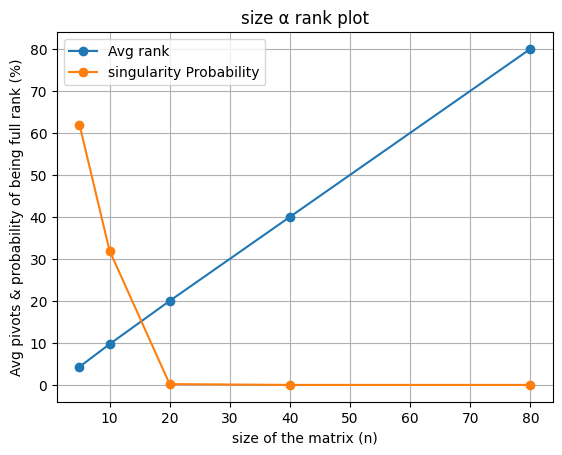

In [134]:
#=====================================================#
# This one may take a coupla minutes, as it involves  #
#       larger calculations specially on n = 80       #
#                                                     #
# I've ran it so you check results but feel free to   #
#              run it youself aswell !                #
#=====================================================#
import matplotlib.pyplot as plt


nvalues = [5,10,20,40,80]
percents = []
num = 500


print(f"In {num} tests we got these results : ")
for i,n in enumerate(nvalues) :
  percents.append(test(n,num))
  print(f"n = {n} : {percents[i]}")

plt.plot(nvalues,percents, marker='o')
plt.xlabel('size of the matrix (n)')
plt.ylabel('Avg pivots & probability of being full rank (%)')
plt.title('size α rank plot')
plt.legend(["Avg rank","singularity Probability"])
plt.grid(True)
plt.show()


# we can see as the n goes higher the chance of it being a full ranked matrix tends to 100%
# because having a fully 0 row, or the same rows in a large matrix rarely happens and it's
# expected for most of them to be full rank. Also the chance of singularity tends to 0 as it's
# harder to have non-Fullrank matrices in higher ns, they're like two sides of the same coin.

## 4. Application of Cholesky decomposition
#### 4-1-  Cholesky decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU}  $$
if the A is symmetric then we have the Cholesky decomposition :
$$
\mathbf{A}^T=\mathbf{A} \longrightarrow \mathbf{A} =LD^\frac{1}{2}D^\frac{1}{2} L^T= (LD^\frac{1}{2})(LD^\frac{1}{2})^T=L'{L'} ^T
$$
There are various methods for calculating the Cholesky decomposition one of them is $\bold{Cholesky–Banachiewicz}$ algorithm :
$$
A=LL^T=\begin{bmatrix}
    L_{11}& 0 & 0\\
    L_{21} & L_{22} & 0\\
    L_{31}  & L_{32}  & L_{33}
\end{bmatrix}\begin{bmatrix}
    L_{11}  & L_{21}  & L_{31} \\
    0  & L_{22}  & L_{32} \\
    0 & 0 & L_{33}
\end{bmatrix}=\begin{bmatrix}
    L_{11}^2  &   & (symmetric) \\
    L_{21}L_{11}  & L_{21}^2+L_{22}^2  &  \\
    L_{31}L_{11}& L_{31}L_{21}+L_{32}L_{22}& L_{33}^2+L_{32}^2+L_{31}^2
\end{bmatrix}
$$

and therefore the following formulas for the entries of L:

$$
L_{jj}=\sqrt{A_{jj}-\sum_{k=1}^{j-1}L_{jk}^2} \\
\\
L_{i,j}=\frac{\left(A_{ij}-\sum_{k=1}^{j-1}L_{jk}L_{ik}\right)}{L_{jj}} \  \ for \ \ i>j
$$

> Use this algorithm to write a function that takes a matrix and gives its cholesky decomposition. also print the output for the following matrix :
$$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$


> then use np.linalg.cholesky to check your answer

In [120]:
# We define a zero matrix, so the upper triangle elements are already set.
# for i>=j elements we use L_coeff function which is defined after Cholesky function

def Cholesky(A):
  size = len(A)
  L = np.zeros([size,size])
  for i in range(1,size+1):
    for j in range(1,size+1):
      if(i>=j):
        L[i-1][j-1] = L_coeff(A,i,j)

  return L



# As the given formulas are recursive themselves we use the same strat here to
# calculate desired coefficients.
def L_coeff(A,i,j):

  summation = 0
  answer = 0

  if(i==j):
    for k in range(1,j):
      summation += L_coeff(A,j,k)**2
    answer = math.sqrt(A[j-1][j-1] - summation)
    #As matrix elements start from 0 we have to use j-1 & i-1

  else:
    for k in range(1,j):
      summation += L_coeff(A,j,k) * L_coeff(A,i,k)
    answer = (A[i-1][j-1] - summation) / L_coeff(A,j,j)

  return answer




C = [[1 , 0.7],
     [0.7, 1]]

print("manuall Cholesky function:")
print(Cholesky(C))

print("\n===================\n")

print("np Cholesky function:")
print(np.linalg.cholesky(C))


manuall Cholesky function:
[[1.         0.        ]
 [0.7        0.71414284]]


np Cholesky function:
[[1.         0.        ]
 [0.7        0.71414284]]


#### 4-2-  Using Cholesky to generate correlated random numbers

The co-variance Matrix of any random vector Y
 is given as $\mathbf{E}(YY^T)$
, where Y
 is a random column vector of size n×1
. Now take a random vector, X
, consisting of uncorrelated random variables with each random variable, $X_i$
, having zero mean and unit variance 1
. Since $X_i$
's are uncorrelated random variables with zero mean and unit variance, we have $\mathbf{E}(X_i X_j^T)=δ_{ij}$
. Hence,
$$
\mathbf{E}(XX^T)=I
$$
To generate a random vector with a given covariance matrix $\mathbf{C}$
, look at the Cholesky decomposition of $C$
 i.e. $\mathbf{C}=LL^T$

Now look at the random vector $Z=LX$ :
$$
\mathbf{E}(ZZ^T)=\mathbf{E}\left((LX)(LX)^T\right)=L\mathbf{E}(XX^T)L^T =LL^T=\mathbf{C}
$$
Hence, the random vector $\mathbf{Z}$
 has the desired co-variance matrix, $\mathbf{C}$

 >Make the covarience matirx of $C$
  $$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$


 >Then we need another matrix with the desired standard deviation in the diagonal  $\Tau$
 $$
\mathbf{\Tau}=
\begin{bmatrix}
    1 & 0 \\
    0 & 2
\end{bmatrix}
$$
>Then find the cholesky decomposition of $C$


In [121]:
C = [[1, 0.7],
     [0.7, 1]]


L = Cholesky(C)
print(L)

[[1.         0.        ]
 [0.7        0.71414284]]


>Now  generate values for 2 independent random variables and put them in  2*1000 matrix $X$ (1000 samples)

you can use np.random.normal ( generates iid random variables each time )

In [122]:
mu, sigma = 0, 1
X = np.random.normal(mu, sigma, 2000).reshape(2,1000)

>then calculate $\mathbf{Z}=\Tau L X$ and then plot Z[1] in base of Z[0] and X[1] in base of X[0]

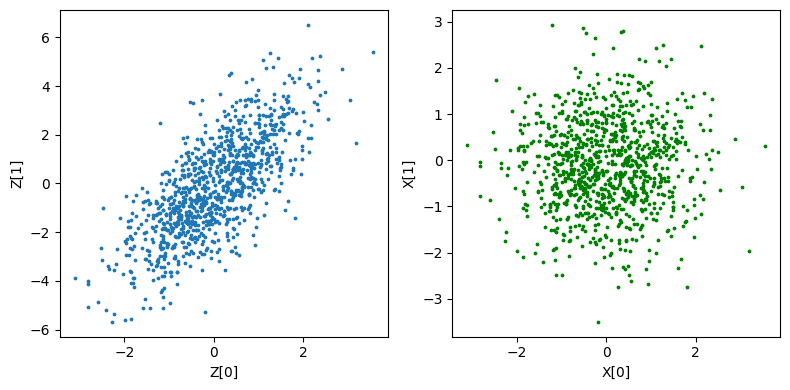

In [123]:
tau = [[1, 0],
       [0, 2]]


Z = np.dot(np.dot(tau,L) , X)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(Z[0], Z[1], s=3)
ax[0].set_xlabel('Z[0]')
ax[0].set_ylabel('Z[1]')

ax[1].scatter(X[0], X[1], s=3, c='g')
ax[1].set_xlabel('X[0]')
ax[1].set_ylabel('X[1]')

plt.tight_layout()
plt.show()

>now  check the correlation in generated samples with using np.correlate

In [125]:
print(np.correlate(Z[0],Z[1]))

[1465.7190396]


## 5. Graphs (bonus)

I suggest running this question's code cells in google colab to install the $\textbf{PyGSP}$ package by  simply running the following code cell

In [14]:
!pip install pygsp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:00


# New Section
<!-- ![]( graph.png) -->
<div style="text-align:center">
    <img src="graph.png" alt="Image" />
</div>


For the directed graph above the adjacency matrix is :
$
A = \begin{bmatrix}
    0  & 1  & 1 & 0\\
    -1  & 0  & 1 & 1 \\
    -1 & -1 & 0 & 1 \\
    0  & -1  & -1 & 0
\end{bmatrix}
$

If we change the nodes numbering, the properties of the graph don't change yet the adjacency matrix changes.


In [169]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import cv2

# cv2.imshow crashes in google colab so we have to use cv2_imshow:
from google.colab.patches import cv2_imshow


#### 5-1-  Introduction to graphs
>construct the permutation matrix $\textbf{P}$ by modifying the Identity matrix. then use it to number the graph's nodes in reverse order

In [180]:
A = [[ 0, 1, 1, 0],
     [-1, 0, 1, 1],
     [-1,-1, 0, 1],
     [ 0,-1,-1, 0]]


def P(a,b):
  a -= 1
  b -= 1
  I = np.identity(4,dtype=int)
  I_clone = np.copy(I)
  temp = I_clone[a]
  I[a] = I[b]
  I[b] = I_clone[a]
  return I

A = np.dot(P(1,4),A)
A = np.dot(P(2,3),A)
A = np.dot(A,P(1,4))
A = np.dot(A,P(2,3))


A_modified = A
print(A_modified)

[[ 0 -1 -1  0]
 [ 1  0 -1 -1]
 [ 1  1  0 -1]
 [ 0  1  1  0]]


In [183]:
# Evaluation Cell
assert (A_modified == np.matrix('0 -1 -1 0; 1 0 -1 -1; 1 1 0 -1; 0 1 1 0')).all, "wrong!"

#### 5-2-  Graph image processing  

Inpainting is a classical signal processing problem where we wish to fill in the missing values in a
partially observed signal. This is here done in the context of image processing for inferring missing pixel values in
an image. The signal in the image is considered to be the image matrix flattened while the image is modeled as a 2D grid graph.
Inpainting for an image can be formulated as below:

$$(M + \alpha L)x = y$$

where y is a partially observed graph signal (with missing values being 0), and M is a diagonal matrix that satisfies:
 $$ M(i, i)=   \left\{
\begin{array}{ll}
      1, & if & y(i) & is & observed, \\
      0, & if & y(i) & is & not & observed, \\
\end{array}
\right.  $$

The Equation tries to find an x that nearly matches the observed values in y, and at the same time
being smooth on the graph (the image here). The regularisation parameter α controls the trade-off between the data fidelity term and the
smoothness prior. The solution can therefore be considered as an inpainted version of the partially observed signal.

>Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 64 by 64, then display the image using matplotlib.pyplot

- do not forget to convert RGB to gray to reduce the 3 color channels to one

we can see that the image has only 1 channel now:
(64, 64)


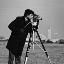

In [206]:
image = cv2.imread("cameraman.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image , (64,64))
print("we can see that the image has only 1 channel now:")
print(image.shape)
cv2_imshow(image)

>Now flatten the image matrix to get the signal\
>Then, construct the diagonal matrix M which has its diagonal 0 except for $p = 50%$ of its elements that are randomly set to 1\
>At last, apply the observasion matrix M to the signal and construct y

In [229]:
flatten_image = image.flatten() #could also use reshape(-1)
print(f"We can see from the shape that the image is flatten now : {flatten_image.shape}")

p = 0.5  #(50/100)
n = flatten_image.shape[0]
M = np.zeros((n,n))

# Then using random method of numpy we choose a random sample with size of n*p
# and make those indices in M equal to 1
# finnaly we apply it to our flatter image
indices = np.random.randint(n, size=int(n*p))
M[indices,indices] = 1
y = M @ flatten_image


We can see from the shape that the image is flatten now : (4096,)


In [230]:
# do not edit this cell
G = graphs.Grid2d(64,64)
L = G.L

>To get x, apply the $\textbf{Cholesky decomposition}$ to ( $M+\alpha L$ ) and then solve the stated equation applying np.linalg.inv() to the two terms multiplied by x ( note that L is given by the code cell above )
- check the soloution with "np.linalg.solve()"

In [239]:
# we make our solver then compare it to the linalg.solve

def solver(alpha,L,M):
  C = np.linalg.cholesky(M + alpha*L)
  x = np.matmul(np.linalg.inv(C.transpose()) , np.matmul(np.linalg.inv(C) , y).transpose())
  return x


alpha = 0.1
x = solver(alpha , L , M)
x_direct = np.linalg.solve(M + alpha*L, y)

print(x)
print("\n======VS======\n")
print(x_direct)

[[157.83506665]
 [158.01684565]
 [158.27520117]
 ...
 [119.92712338]
 [114.21670142]
 [110.19396447]]

======VS======

[157.83506665 158.01684565 158.27520117 ... 119.92712338 114.21670142
 110.19396447]


>For values of alpha 0.001 , 0.1 , 10 and p values 50 , 75 display the original, the damaged and the Inpainted image in subplot

In [ ]:
# I ran out of time to plot them 😭, the actuall part where it gets interesting :(((